In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Import basic Library.

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

Read Dataset from gethub.

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Top 5 row has been displayed

In [8]:
df.shape

(1599, 12)

There are total 1559 Raw and 12 columns are present in dataset

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No any Null value is present in dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Complete informations of data has been displayed. There are 11 Colums Dtype is float64 and 1 colimns Dtype is Int64 and Null counts is also zero.

In [11]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


According to correlations results found some raws are positive and some are negative correlated.

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From correlation matrix total sulfur dioxide seems to have some outliers as there is significant difference between mean and median

## Lets do some graphical EDA

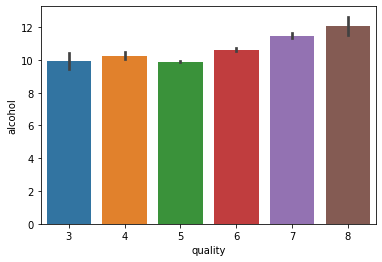

In [13]:
import matplotlib.pyplot as plt
sns.barplot(x="quality",y="alcohol",data=df)

from below barplot it can be seen there is increasing trend in average alcohol content from 5 to 8

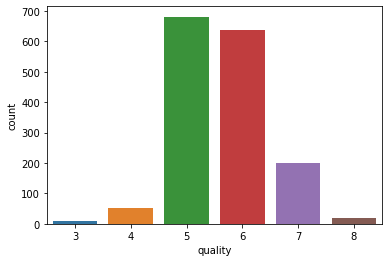

In [14]:
sns.countplot(x="quality",data=df)

Here we can see that most of the wines of quality 5 and 6 in the datset. Other 3 and 8 are very very less so barplot may not give clear picture about average alcohol content as instances are very less

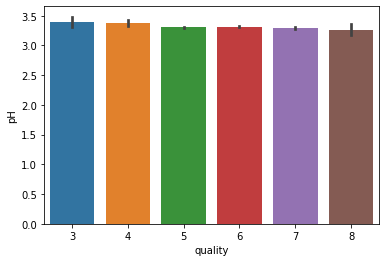

In [16]:
sns.barplot(x="quality",y="pH",data=df)

Keeping in mind the above points checked average ph content in each type of wines. It is alomost same in each type of wine and hardly shows any variance

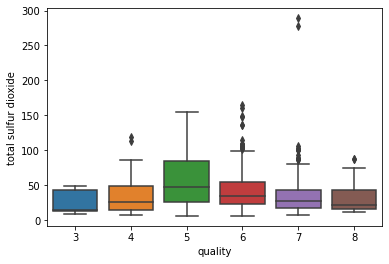

In [17]:
sns.boxplot(x="quality",y="total sulfur dioxide",data=df)

From correlation matrix above total sulfur dioxide seem to have outliers same verify this using boxplot.we see presence of outliers graphically here as we could see in correlation matrix.

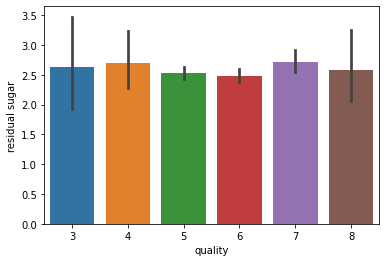

In [18]:
sns.barplot(x="quality",y="residual sugar",data=df)

### Lets remove the outliers if present using z scores

In [21]:
from scipy.stats import zscore
z_scr=zscore(df)
print(df.shape)
df_new=df.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(1599, 12)
(1451, 12)


Using zscore there are 148 row has been removed means 9% data has been removed.

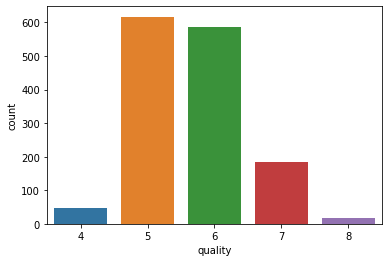

In [22]:
sns.countplot(x="quality",data=df_new)

Again chcek presence of each type of quality in the df_new since outliers have been removed. we see we have removed one type of quality from the dataset

In [23]:
bins = (2, 6.5, 8)
classs = ['bad', 'good']
df_new['quality'] = pd.cut(df_new['quality'], bins = bins, labels = classs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


converted target variable into binary classification problem with variable Bad and Good.

In [24]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


Dependent variable has been converted in binary form.

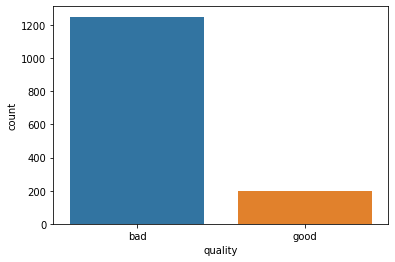

In [25]:
sns.countplot(x="quality",data=df_new)

This the case of highly imbalance data

In [28]:
df_x=df_new.drop(columns=["quality"])
y=df_new[["quality"]]
print(df_x.shape)
print(y.shape)

(1451, 11)
(1451, 1)


Devide Dataset into dependent and independent variables.

In [29]:
df_x.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
dtype: float64

Number of features having skewness more than 0.50

In [31]:
len(df_x.skew().loc[df_x.skew()>0.50])

7

there are 7 columns  having skewness more than 0.50.

In [34]:
import numpy as np
for index in df_x.skew().index:
    if df_x.skew().loc[index] >0.55:
        df_x[index]=np.cbrt(df_x[index])
len(df_x.skew().loc[df_x.skew()>0.50])

5

There are 5 columns having skewness more than 0.50.

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

Using StandardScalar scalled data in same range.

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

Converted the target variable into integers

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

It is imbalanced dataset so we will focus on auc-roc score

In [38]:

from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)

auc roc score corresponding to  42  is  0.7746513944223108
auc roc score corresponding to  43  is  0.7306274900398406
auc roc score corresponding to  44  is  0.7521912350597609
auc roc score corresponding to  45  is  0.6550796812749005
auc roc score corresponding to  46  is  0.7311752988047808
auc roc score corresponding to  47  is  0.7601593625498008
auc roc score corresponding to  48  is  0.7351593625498007
auc roc score corresponding to  49  is  0.7451195219123506
auc roc score corresponding to  50  is  0.6826195219123506
auc roc score corresponding to  51  is  0.7581673306772908
auc roc score corresponding to  52  is  0.6726593625498007
auc roc score corresponding to  53  is  0.8070717131474103
auc roc score corresponding to  54  is  0.6846115537848606
auc roc score corresponding to  55  is  0.7596115537848606
auc roc score corresponding to  56  is  0.8181274900398408
auc roc score corresponding to  57  is  0.7706673306772909
auc roc score corresponding to  58  is  0.75363545816733

68

max auc roc score corresponding to  68  is  0.8326195219123507

In [39]:
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for decision tree classifier:  0.6539731707317074
standard deviation in roc auc score for decision tree classifier:  0.05719786461779163
[0.56117073 0.6745     0.7165     0.7375     0.584     ]


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 29}

KNN model is giving best accuracy on n_neighbors': 29.

In [41]:
kc=KNeighborsClassifier(n_neighbors=29)
max_aucroc_score(kc,x,y)

auc roc score corresponding to  42  is  0.6255478087649402
auc roc score corresponding to  43  is  0.6175796812749004
auc roc score corresponding to  44  is  0.6300796812749004
auc roc score corresponding to  45  is  0.6295318725099601
auc roc score corresponding to  46  is  0.6150398406374502
auc roc score corresponding to  47  is  0.6505478087649402
auc roc score corresponding to  48  is  0.5900398406374502
auc roc score corresponding to  49  is  0.6880478087649402
auc roc score corresponding to  50  is  0.6155876494023904
auc roc score corresponding to  51  is  0.5300796812749005
auc roc score corresponding to  52  is  0.6610557768924303
auc roc score corresponding to  53  is  0.6065239043824702
auc roc score corresponding to  54  is  0.5780876494023904
auc roc score corresponding to  55  is  0.6090637450199203
auc roc score corresponding to  56  is  0.6010956175298805
auc roc score corresponding to  57  is  0.6400398406374502
auc roc score corresponding to  58  is  0.63605577689243

49

max auc roc score corresponding to  81  is  0.6795318725099602

In [42]:
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for  KNN classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for KNN classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(kc,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for  KNN classifier:  0.837628780487805
standard deviation in roc auc score for KNN classifier:  0.02201528340743805
[0.8482439 0.8482    0.86725   0.81615   0.8083   ]


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 500}

RandomForestClassifier giving best performance at n_estimators: 500

In [44]:
rf_clf=RandomForestClassifier(n_estimators=500)
max_aucroc_score(rf_clf,df_x,y)

auc roc score corresponding to  42  is  0.7755478087649402
auc roc score corresponding to  43  is  0.7525398406374503
auc roc score corresponding to  44  is  0.7380478087649402
auc roc score corresponding to  45  is  0.7065239043824701
auc roc score corresponding to  46  is  0.7695717131474104
auc roc score corresponding to  47  is  0.7445717131474103
auc roc score corresponding to  48  is  0.7255478087649403
auc roc score corresponding to  49  is  0.7815239043824701
auc roc score corresponding to  50  is  0.6485557768924303
auc roc score corresponding to  51  is  0.7670318725099602
auc roc score corresponding to  52  is  0.7300796812749004
auc roc score corresponding to  53  is  0.7210159362549801
auc roc score corresponding to  54  is  0.6920318725099601
auc roc score corresponding to  55  is  0.7550796812749004
auc roc score corresponding to  56  is  0.8170318725099601
auc roc score corresponding to  57  is  0.7985557768924303
auc roc score corresponding to  58  is  0.72554780876494

92

max auc roc score corresponding to  92  is  0.8530876494023905

In [45]:
print("Mean roc auc score for random forest classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for random forest classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for random forest classifier:  0.8614134146341463
standard deviation in roc auc score for random forest classifier:  0.017163378840724195
[0.89380488 0.87795    0.8852     0.8478     0.8428    ]


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

GradientBoostingClassifier giving best performance learning_rate: 0.1 and n_estimators: 100

In [47]:
gb_clf=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
max_aucroc_score(gb_clf,df_x,y)

auc roc score corresponding to  42  is  0.7675796812749004
auc roc score corresponding to  43  is  0.7650398406374502
auc roc score corresponding to  44  is  0.7116035856573706
auc roc score corresponding to  45  is  0.6670318725099602
auc roc score corresponding to  46  is  0.7715637450199203
auc roc score corresponding to  47  is  0.7635956175298805
auc roc score corresponding to  48  is  0.7005478087649403
auc roc score corresponding to  49  is  0.7900398406374503
auc roc score corresponding to  50  is  0.6280876494023905
auc roc score corresponding to  51  is  0.7195717131474104
auc roc score corresponding to  52  is  0.7260956175298805
auc roc score corresponding to  53  is  0.7045318725099602
auc roc score corresponding to  54  is  0.6630478087649403
auc roc score corresponding to  55  is  0.7741035856573706
auc roc score corresponding to  56  is  0.8070717131474103
auc roc score corresponding to  57  is  0.7695717131474104
auc roc score corresponding to  58  is  0.73406374501992

68

max auc roc score corresponding to  68  is  0.8090637450199203

In [48]:
print("Mean roc auc score for gradient boosting classifier: ",cross_val_score(gb_clf,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for gradient boosting classifier: ",cross_val_score(gb_clf,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(gb_clf,df_x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for gradient boosting classifier:  0.8747058536585367
standard deviation in roc auc score for gradient boosting classifier:  0.037559510012585146
[0.92273171 0.8732     0.9093     0.8323     0.8324    ]


In [49]:
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 0.001, 'kernel': 'linear'}

SVC giving best performance at C: 0.001 and kernel: linear

In [50]:
svc=SVC(kernel="linear",C=0.1)
max_aucroc_score(svc,x,y)

auc roc score corresponding to  42  is  0.6045318725099602
auc roc score corresponding to  43  is  0.525
auc roc score corresponding to  44  is  0.6420318725099602
auc roc score corresponding to  45  is  0.5815239043824701
auc roc score corresponding to  46  is  0.5
auc roc score corresponding to  47  is  0.6195717131474103
auc roc score corresponding to  48  is  0.5650398406374502
auc roc score corresponding to  49  is  0.5
auc roc score corresponding to  50  is  0.5940239043824701
auc roc score corresponding to  51  is  0.5650398406374502
auc roc score corresponding to  52  is  0.6110557768924303
auc roc score corresponding to  53  is  0.5
auc roc score corresponding to  54  is  0.5545318725099602
auc roc score corresponding to  55  is  0.5965637450199204
auc roc score corresponding to  56  is  0.6380478087649403
auc roc score corresponding to  57  is  0.5
auc roc score corresponding to  58  is  0.5650398406374502
auc roc score corresponding to  59  is  0.6045318725099602
auc roc sco

64

max auc roc score corresponding to  56  is  0.6505478087649402

In [51]:
print("Mean roc auc score for SVM classifier: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for SVM classifier: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(svc,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for SVM classifier:  0.8846282926829268
standard deviation in roc auc score for SVM classifier:  0.01944014157208362
[0.90234146 0.8749     0.9113     0.8581     0.8765    ]


Based on above scores we can choose random forest as there we are achieving highest auc_roc score with random state 92

In [52]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 92,test_size=0.20,stratify=y)
rf_clf=RandomForestClassifier(n_estimators=500)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[240  11]
 [ 11  29]]
f1 score is :  0.7250000000000001
classification report 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       251
           1       0.72      0.72      0.73        40

    accuracy                           0.92       291
   macro avg       0.84      0.84      0.84       291
weighted avg       0.92      0.92      0.92       291

AUC ROC Score:  0.8405876494023905


In [54]:
import pickle
import joblib
pickle.dump(rf_clf,open('wine_datset_random_forest.pkl','wb'))
joblib.dump(rf_clf,'wine_datset_random_forest.obj')

['wine_datset_random_forest.obj']